In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
irr_df = pd.read_csv('/Users/jameswallace/Desktop/SIF_MISCADA_PROJECT/iradiance_hyspec.csv')

In [3]:
irr_df.head()

,wavelength,Irradiance,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,199.12,7.38,NaN,NaN,NaN
1,199.48,7.50,NaN,NaN,NaN
2,199.84,7.68,NaN,NaN,NaN
3,200.20,7.79,NaN,NaN,NaN
4,200.56,7.93,NaN,NaN,NaN


Text(0, 0.5, 'Irradiance')

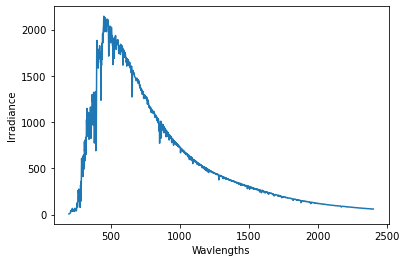

In [4]:
plt.plot(irr_df['wavelength'], irr_df['Irradiance']) # plot hypsec irradaince spectra
plt.xlabel('Wavlengths')
plt.ylabel('Irradiance')
#plt.xlim(540, 600)

(200.0, 800.0)

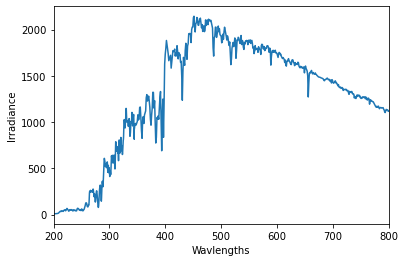

In [25]:
plt.plot(irr_df['wavelength'], irr_df['Irradiance']) # plot hypsec irradaince spectra
plt.xlabel('Wavlengths')
plt.ylabel('Irradiance')
plt.xlim(200, 800)

In [6]:
# now plot Py6S spectra
py6s_wave_df = pd.read_excel('/Users/jameswallace/Desktop/Project/FENIX_Bands.xlsx', index_col=0)
py6s_df = pd.read_csv('/Users/jameswallace/Desktop/SIF_MISCADA_PROJECT/py6s_generate_irradiance/17_06_2021_13:18_irradiance.csv', index_col= 0)

In [7]:
py6s_df.head()

,0
0,663.449
1,704.679
2,570.117
3,644.839
4,720.465


In [8]:
py6s_wave_df.head()

,Wavelength,FWHM_2019,Unnamed: 3,Wavelength_2018,FWHM_2018,Unnamed: 6,Unnamed: 7
ID,,,,,,,
1,377.32,3.35,NaN,377.73,3.35,NaN,-0.41
2,380.67,3.35,NaN,381.09,3.35,NaN,-0.42
3,384.03,3.36,NaN,384.44,3.36,NaN,-0.41
4,387.39,3.36,NaN,387.80,3.36,NaN,-0.41
5,390.74,3.36,NaN,391.16,3.36,NaN,-0.42


(750.0, 775.0)

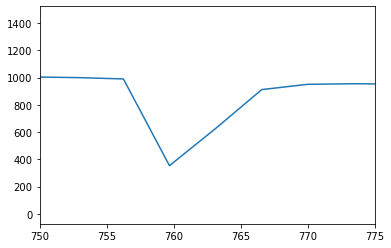

In [9]:
plt.plot(py6s_wave_df['Wavelength'], py6s_df['0'])
plt.xlim(750, 775)

(680.0, 700.0)

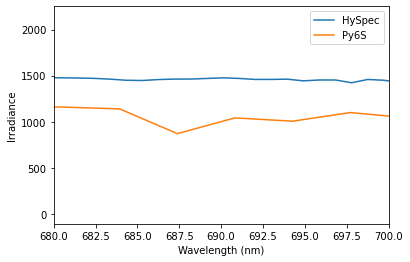

In [27]:
plt.plot(irr_df['wavelength'], irr_df['Irradiance'], label = 'HySpec')
plt.plot(py6s_wave_df['Wavelength'], py6s_df['0'], label = 'Py6S')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Irradiance')
plt.legend()
plt.xlim(680, 700)

In [55]:
irr_df

,wavelength,Irradiance,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,199.12,7.38,NaN,NaN,NaN
1,199.48,7.50,NaN,NaN,NaN
2,199.84,7.68,NaN,NaN,NaN
3,200.20,7.79,NaN,NaN,NaN
4,200.56,7.93,NaN,NaN,NaN
...,...,...,...,...,...
8208,2395.21,60.57,NaN,NaN,NaN
8209,2395.78,60.53,NaN,NaN,NaN
8210,2396.36,60.48,NaN,NaN,NaN
8211,2396.93,60.48,NaN,NaN,NaN


In [56]:
from FLD_methods import *

In [57]:
differences = []
for i in range(len(irr_df) - 1):
    diff = irr_df['wavelength'][i+1] - irr_df['wavelength'][i]
    round(diff, 2)
    differences.append(diff)
differences.append(differences[-1])

In [58]:
irr_df['fwhm'] = differences

Text(0, 0.5, 'FWHM')

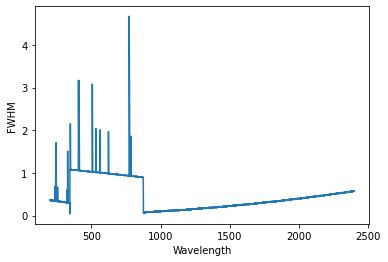

In [59]:
plt.plot(irr_df['wavelength'], irr_df['fwhm'])
plt.xlabel('Wavelength')
plt.ylabel('FWHM')

In [60]:
measured_wavelengths = np.asarray(py6s_wave_df['Wavelength']) # measured wavelengths
modelled_irr = np.asarray(irr_df['Irradiance']) # modelled irradiance at incorrect wavelengths
modelled_wave = np.asarray(irr_df['wavelength']) # wavelengths model was sampled over

In [61]:
# search for closet wavelengths with the find_nearest function and get the irradiance value
hack_irr = []
for i in range(len(measured_wavelengths)):
    irr_index = find_nearest(modelled_wave, measured_wavelengths[i])
    hack_irr.append(modelled_irr[irr_index])

(650.0, 675.0)

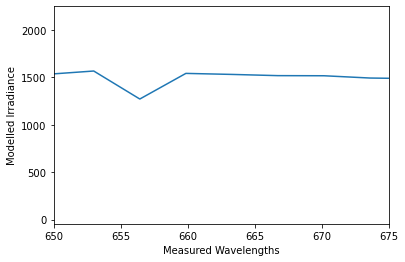

In [62]:
plt.plot(measured_wavelengths, hack_irr)
plt.xlabel('Measured Wavelengths')
plt.ylabel('Modelled Irradiance')
plt.xlim(650, 675)
#plt.ylim(1000, 1500)

(750.0, 800.0)

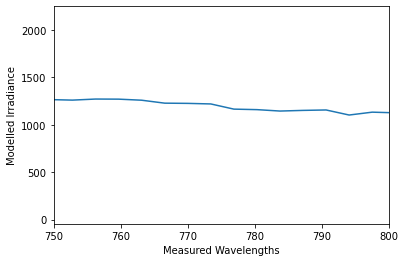

In [63]:
plt.plot(measured_wavelengths, hack_irr)
plt.xlabel('Measured Wavelengths')
plt.ylabel('Modelled Irradiance')
plt.xlim(750, 800)
#plt.ylim(1000, 1500)

In [64]:
output_name = '/Users/jameswallace/Desktop/Project/data/gold/s6_5240_E.csv'
r_app_df = pd.read_csv(output_name, index_col=0)
r_app_df.head()

,y,x,1,2,3,4,5,6,7,8,...,440,441,442,443,444,445,446,447,448,449
0,5811831.156,444143.329,0.010086,0.032654,0.027237,0.029938,0.024475,0.022491,0.017654,0.024460,...,0.010666,0.007118,0.002325,0.002638,0.0,0.000000,0.665039,2.000000,1.253906,0.890625
1,5811830.156,444142.329,0.010086,0.028488,0.024109,0.029175,0.027222,0.026581,0.018661,0.023544,...,0.010666,0.007118,0.005074,0.000000,0.0,0.006298,0.692383,2.000000,1.326172,0.897949
2,5811830.156,444143.329,0.007172,0.024750,0.026199,0.029175,0.027222,0.022247,0.017654,0.024292,...,0.010666,0.004101,0.000950,0.002638,0.0,0.009697,0.681152,2.000000,1.285156,0.890625
3,5811830.156,444144.329,0.007172,0.028488,0.026199,0.030594,0.029556,0.014946,0.018234,0.022537,...,0.001770,0.000000,0.003700,0.001101,0.0,0.002899,0.687012,2.000000,1.285156,0.890625
4,5811829.156,444141.329,0.011818,0.027344,0.018219,0.026596,0.029007,0.031311,0.015793,0.025650,...,0.000000,0.004101,0.000000,0.001101,0.0,0.000000,0.675781,1.990234,1.274414,0.883789


In [70]:
l_spectra = np.asarray(r_app_df.iloc[0][2:]) * np.asarray(py6s_df['0']) / np.pi

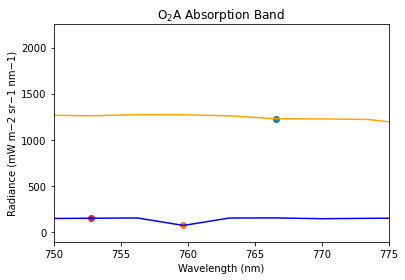

-2868.6502655656054

In [71]:
sFLD(e_spectra=np.asarray(hack_irr), l_spectra=l_spectra, wavelengths=measured_wavelengths, fwhm = 3.5, band = 'A')

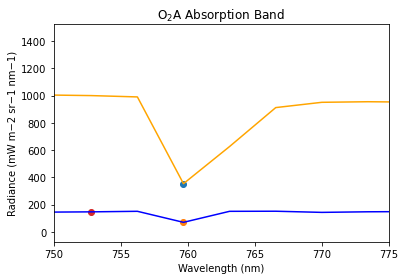

28.1752255473403

In [72]:
sFLD(e_spectra=np.asarray(py6s_df['0']), l_spectra = l_spectra, wavelengths=measured_wavelengths, fwhm = 3.5)

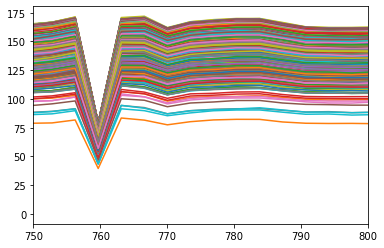

In [69]:
e_spectra=np.asarray(py6s_df['0'])
for i in range(len(r_app_df)):
    l_spectra = np.asarray(r_app_df.iloc[i][2:]) * e_spectra / np.pi
    plt.plot(measured_wavelengths, l_spectra)
    plt.xlim(750, 800)
    

In [59]:
d = {'0': hack_irr}
final_irradiance_df = pd.DataFrame(data = d)

In [60]:
final_irradiance_df.to_csv('final_irradiance_df.csv')